<a href="https://colab.research.google.com/github/joyleen-dsouza/loan_predictor/blob/master/loan_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
df=pd.read_csv("data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


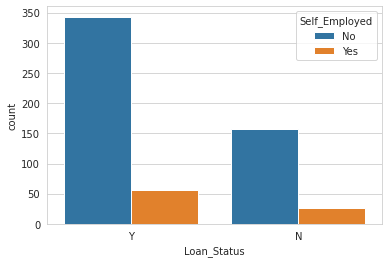

In [223]:
sns.countplot(x='Loan_Status',hue='Self_Employed', data=df)

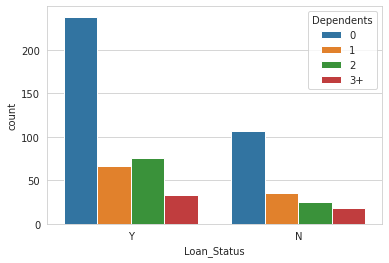

In [224]:
sns.countplot(x='Loan_Status',hue='Dependents', data=df)

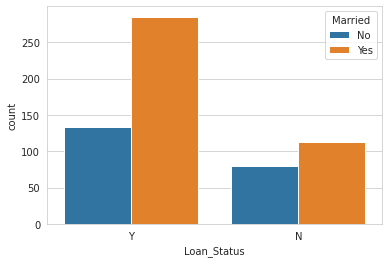

In [225]:
sns.countplot(x='Loan_Status',hue='Married', data=df)

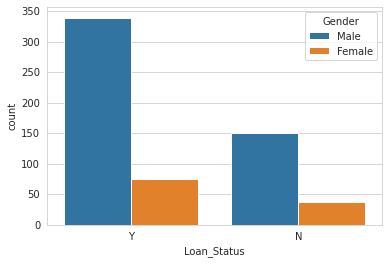

In [ ]:
sns.countplot(x='Loan_Status',hue='Gender', data=df)

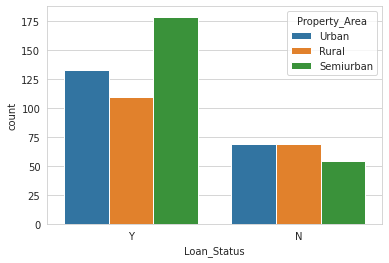

In [226]:
sns.countplot(x='Loan_Status',hue='Property_Area', data=df)

All columns play an important role in predicting'Y' except loan_id

A maried man with 0 dependents and not self employed living in semiurban area is likely to repay the loan.

In [228]:
df.median()

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [229]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [230]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.median())

In [231]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [232]:
df.Credit_History=df.Credit_History.fillna('1.0')

In [233]:
df.Dependents=df.Dependents.replace(to_replace=['3+'],value=3)

In [234]:
df=df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [235]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(1,3):
  df.iloc[:,i] = labelencoder.fit_transform(df.iloc[:,i])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [236]:
for i in range(4,6):
  df.iloc[:,i] = labelencoder.fit_transform(df.iloc[:,i])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [237]:
df.iloc[:,-2] = labelencoder.fit_transform(df.iloc[:,-2])
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1])  

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [238]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [239]:
X = df.iloc[:, 1: 12].values
y = df.iloc[:, 12].values

In [240]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.20, random_state=0)

In [241]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Text(0, 0.5, 'Error')

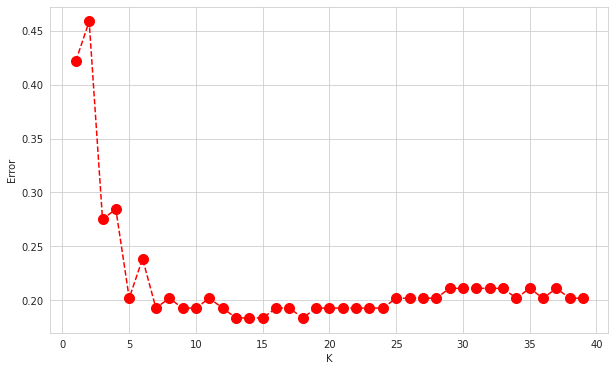

In [242]:
from sklearn.neighbors import KNeighborsClassifier 
error_rate=[]
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(X_train, y_train) 
  predi=knn.predict(X_test)
  error_rate.append(np.mean(predi!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error')

In [260]:
knn = KNeighborsClassifier(n_neighbors=18,metric='minkowski',p=2) 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [261]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred1=knn.predict(X_test)
print(confusion_matrix(y_test, y_pred1))

[[11 20]
 [ 0 78]]


In [262]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        31
           1       0.80      1.00      0.89        78

    accuracy                           0.82       109
   macro avg       0.90      0.68      0.71       109
weighted avg       0.85      0.82      0.78       109



In [247]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()
lmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
y_pred2=lmodel.predict(X_test)
print(confusion_matrix(y_test, y_pred2))

[[10 21]
 [ 0 78]]


In [249]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.32      0.49        31
           1       0.79      1.00      0.88        78

    accuracy                           0.81       109
   macro avg       0.89      0.66      0.68       109
weighted avg       0.85      0.81      0.77       109



In [250]:
from sklearn import svm
svmodel = svm.SVC(kernel='linear', C = 1.0)
svmodel.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [251]:
y_pred3=svmodel.predict(X_test)
print(confusion_matrix(y_test, y_pred3))

[[10 21]
 [ 0 78]]


In [252]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.32      0.49        31
           1       0.79      1.00      0.88        78

    accuracy                           0.81       109
   macro avg       0.89      0.66      0.68       109
weighted avg       0.85      0.81      0.77       109



In [253]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [254]:
y_pred4=nbmodel.predict(X_test)
print(confusion_matrix(y_test,y_pred4))

[[12 19]
 [ 2 76]]


In [255]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.39      0.53        31
           1       0.80      0.97      0.88        78

    accuracy                           0.81       109
   macro avg       0.83      0.68      0.71       109
weighted avg       0.82      0.81      0.78       109



In [256]:
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred1, y_test)*100,'%')
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred2, y_test)*100,'%')
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred3, y_test)*100,'%')
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred4, y_test)*100,'%')

The accuracy of KNN is:  81.65137614678899 %
The accuracy of Logistic Regression is:  80.73394495412845 %
The accuracy of SVM is:  80.73394495412845 %
The accuracy of Naive Bayes is:  80.73394495412845 %


The accuracy of KNN is:  81.65%

The accuracy of Logistic Regression is:  80.73%

The accuracy of SVM is:  80.73%

The accuracy of Naive Bayes is:  80.73%